In [167]:
import pylab as pl
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.optimize as opt
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import randint
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [168]:
#прочитаем  файл и запишем в переменную  heart_train_df 
heart_train_df = pd.read_csv('data/tech-weekend-data-science-hackathon/train.csv')
display(heart_train_df.head(10))

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,0,49.207124,0,4.000000,162.996167,181.108682,0,0,148.227858,1,0.944547,2,0,3,1
1,1,53.628425,1,1.741596,130.233730,276.474630,0,2,152.917139,0,0.119070,2,0,3,0
2,2,49.591426,1,4.000000,146.999012,223.300517,1,2,102.352090,1,1.616747,2,2,7,1
3,3,58.991445,1,4.000000,112.369143,187.245501,0,0,158.164750,1,0.000000,1,1,7,1
4,4,51.053602,1,1.954609,138.032047,238.482868,0,0,172.540828,0,1.150464,1,1,3,0
5,5,61.069909,0,3.000000,117.285359,233.973393,0,0,112.820336,0,0.000000,1,0,3,0
6,6,43.108527,1,4.000000,121.156172,210.307425,0,2,154.180680,1,0.000000,1,0,7,0
7,7,47.204068,1,4.000000,126.261227,215.958580,0,2,163.239001,0,0.000000,1,0,3,0
8,8,55.158454,1,4.000000,164.940705,189.464297,0,2,102.672796,1,0.000000,2,2,7,1
9,9,49.569574,0,1.727698,128.751300,239.304733,0,2,158.839407,0,0.893847,2,0,3,0


In [169]:
#выводим количесиво строк и столбцов
print(heart_train_df.shape)
#выводим названия столбцов
print(heart_train_df.columns.values)

(600000, 15)
['ID' 'age' 'sex' 'chest' 'resting_blood_pressure' 'serum_cholestoral'
 'fasting_blood_sugar' 'resting_electrocardiographic_results'
 'maximum_heart_rate_achieved' 'exercise_induced_angina' 'oldpeak' 'slope'
 'number_of_major_vessels' 'thal' 'class']


#### значения названий столбцов(признаков) в датасете
- Age (возраст);
- Sex (пол);
- Chest (боль в груди от 1 до 4);
- Resting_blood_pressure (артериальное давление в состоянии покоя);
- Serum_cholestoral (уровень холестерина в крови mg/dl);
- Fasting_blood_sugar (анализ глюкозы в крови натощак (> 120 mg/dl));
- Maximum_heart_rate_achieved (максимальная частота сердечных сокращений);
- Exercise_induced_angina (стенокардия при нагрузке),
- Oldpeak (депрессия ST-сегмента);
- Slope (наклон пикового сегмента ST при физической нагрузке);
- Number_of_major_vessels (количество крупных сосудов (0-3), окрашенных с помощью флюороскопии);
- Resting_electrocardiographic_results (результаты электрокардиографических исследований в покое 0, 1, 2);
- Thal (3 = норма; 6 = фиксированный дефект; 7 = обратимый дефект);
- class (наличие - 1 или отсутствие -0 сердечно-сосудистого заболевания)

In [170]:
#с помощью функции info узнаем о столбцах и строках датасета
heart_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600000 entries, 0 to 599999
Data columns (total 15 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    600000 non-null  int64  
 1   age                                   600000 non-null  float64
 2   sex                                   600000 non-null  int64  
 3   chest                                 600000 non-null  float64
 4   resting_blood_pressure                600000 non-null  float64
 5   serum_cholestoral                     600000 non-null  float64
 6   fasting_blood_sugar                   600000 non-null  int64  
 7   resting_electrocardiographic_results  600000 non-null  int64  
 8   maximum_heart_rate_achieved           600000 non-null  float64
 9   exercise_induced_angina               600000 non-null  int64  
 10  oldpeak                               600000 non-null  float64
 11  

In [171]:
# определим количество пропусков
heart_train_df.isna().sum()

ID                                      0
age                                     0
sex                                     0
chest                                   0
resting_blood_pressure                  0
serum_cholestoral                       0
fasting_blood_sugar                     0
resting_electrocardiographic_results    0
maximum_heart_rate_achieved             0
exercise_induced_angina                 0
oldpeak                                 0
slope                                   0
number_of_major_vessels                 0
thal                                    0
class                                   0
dtype: int64

In [172]:
# определяем, есть ли дублирующиеся записи
duplicates = heart_train_df[heart_train_df.duplicated()]
print('Число дубликтов: {}'.format(duplicates.shape[0]))

Число дубликтов: 0


In [173]:
# удалим столбец с ID пациента, как малоинформативный для обучения
heart_train_df = heart_train_df.drop('ID', axis=1)

In [174]:
# округлим значения возраста до целого числа
heart_train_df['age'] = heart_train_df['age'].apply(round)
# округлим значения признака боли в груди до 1 знака после запятой
heart_train_df['chest'] = np.round(heart_train_df['chest'], decimals = 1) 
# округлим величину артериального давления до целого числа
heart_train_df['resting_blood_pressure'] = heart_train_df['resting_blood_pressure'].apply(round)
# уровень холестерина -  до 1 знака после запятой
heart_train_df['serum_cholestoral'] = np.round(heart_train_df['serum_cholestoral'], decimals = 2)
# масимальную частоту сердечных сокращений - до целого числа
heart_train_df['maximum_heart_rate_achieved'] = heart_train_df['maximum_heart_rate_achieved'].apply(round)
# округлим величину депрессии сегмента  ST до 1 знака после запятой
heart_train_df['oldpeak'] = np.round(heart_train_df['oldpeak'], decimals = 1)

In [175]:
# создадим функцию get_thal, чтобы заменить значения 
# thal - 3 на 0; 6  на 2; 7 на 1 
def get_thal(thal):
        if thal == 7:
            return 1 
        if thal == 6:
            return 2 
        if thal == 3:
            return 0 
#  применяем функцию       
heart_train_df['thal'] = heart_train_df['thal'].apply(get_thal)

In [176]:
heart_train_df.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,49,0,4.0,163,181.11,0,0,148,1,0.9,2,0,0,1
1,54,1,1.7,130,276.47,0,2,153,0,0.1,2,0,0,0
2,50,1,4.0,147,223.30,1,2,102,1,1.6,2,2,1,1
3,59,1,4.0,112,187.25,0,0,158,1,0.0,1,1,1,1
4,51,1,2.0,138,238.48,0,0,173,0,1.2,1,1,0,0


In [177]:
#с помощью функции describe рассмотрим статистические показатели
heart_train_df.describe()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
count,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000,600000.000000
mean,54.425282,0.677447,3.170233,131.339853,249.592420,0.150757,1.020148,149.592407,0.333502,1.051364,1.596033,0.681303,0.500088,0.444185
std,9.090470,0.467454,0.949750,17.844740,51.699967,0.357812,0.994204,23.073528,0.471464,1.144518,0.629821,0.950669,0.604641,0.496875
min,26.000000,0.000000,-0.500000,83.000000,98.330000,0.000000,0.000000,62.000000,0.000000,-0.800000,1.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,216.480000,0.000000,0.000000,136.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,244.230000,0.000000,2.000000,153.000000,0.000000,0.800000,2.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,274.350000,0.000000,2.000000,165.000000,1.000000,1.700000,2.000000,1.000000,1.000000,1.000000
max,80.000000,1.000000,4.000000,210.000000,527.760000,1.000000,2.000000,209.000000,1.000000,6.800000,3.000000,3.000000,2.000000,1.000000


In [178]:
# отделим колонки  категориальных признаков
categoric_cols = ['sex', 'fasting_blood_sugar',	'resting_electrocardiographic_results', 'exercise_induced_angina', 
                  'number_of_major_vessels', 'thal', 'class']

# определим все уникальные значения категориальных признаков
for i in categoric_cols:
    if i in heart_train_df:
        print('Значения в столбце {0} : \n{1}'.format(i, heart_train_df[i].value_counts().sort_index()))
        print('\n')
    else:
        print(f'Column {i} not found in the DataFrame.')

Значения в столбце sex : 
sex
0    193532
1    406468
Name: count, dtype: int64


Значения в столбце fasting_blood_sugar : 
fasting_blood_sugar
0    509546
1     90454
Name: count, dtype: int64


Значения в столбце resting_electrocardiographic_results : 
resting_electrocardiographic_results
0    290609
1      6693
2    302698
Name: count, dtype: int64


Значения в столбце exercise_induced_angina : 
exercise_induced_angina
0    399899
1    200101
Name: count, dtype: int64


Значения в столбце number_of_major_vessels : 
number_of_major_vessels
0    353137
1    129017
2     73773
3     44073
Name: count, dtype: int64


Значения в столбце thal : 
thal
0    334624
1    230699
2     34677
Name: count, dtype: int64


Значения в столбце class : 
class
0    333489
1    266511
Name: count, dtype: int64




In [179]:
#  проверяем данные на наличие выбросов 
# Воспользуемся функцией outliers_iqr,которая принимает датафрейм, столбец, 
# возвращает выбросы и очищенные данные, а так же позволяет модифицировать границы  при необходимости
# Квантили вычисляются с помощью метода quantile()
# Потенциальные выбросы определяются при помощи фильтрации данных 
# по условию выхода за пределы верхней или нижней границы
def outliers_iqr(data, feature, left=1.5, right=1.5):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * left)
    upper_bound = quartile_3 + (iqr * right)
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    cleaned = data[(x >= lower_bound) & (x <= upper_bound)]
    return outliers, cleaned

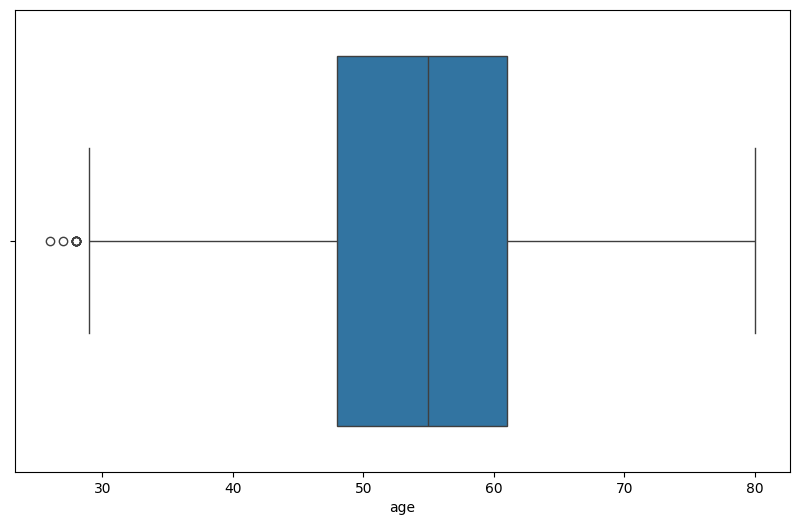

In [180]:
# рассмотрим, как распределяется возраст обследованных
fig = plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(
    data=heart_train_df,
    x='age'
)
# сохраним все значения возраста

In [181]:
# удалим значения признака боли в грудной клетке меньше 1, 
# так как они должны быть от 1 до 4
heart_train_df = heart_train_df[heart_train_df['chest']>1]


(array([1.05500e+03, 5.35730e+04, 1.25089e+05, 1.77012e+05, 1.33492e+05,
        4.29490e+04, 3.71170e+04, 1.48650e+04, 2.05400e+03, 1.16000e+02]),
 array([ 83. ,  95.7, 108.4, 121.1, 133.8, 146.5, 159.2, 171.9, 184.6,
        197.3, 210. ]),
 <BarContainer object of 10 artists>)

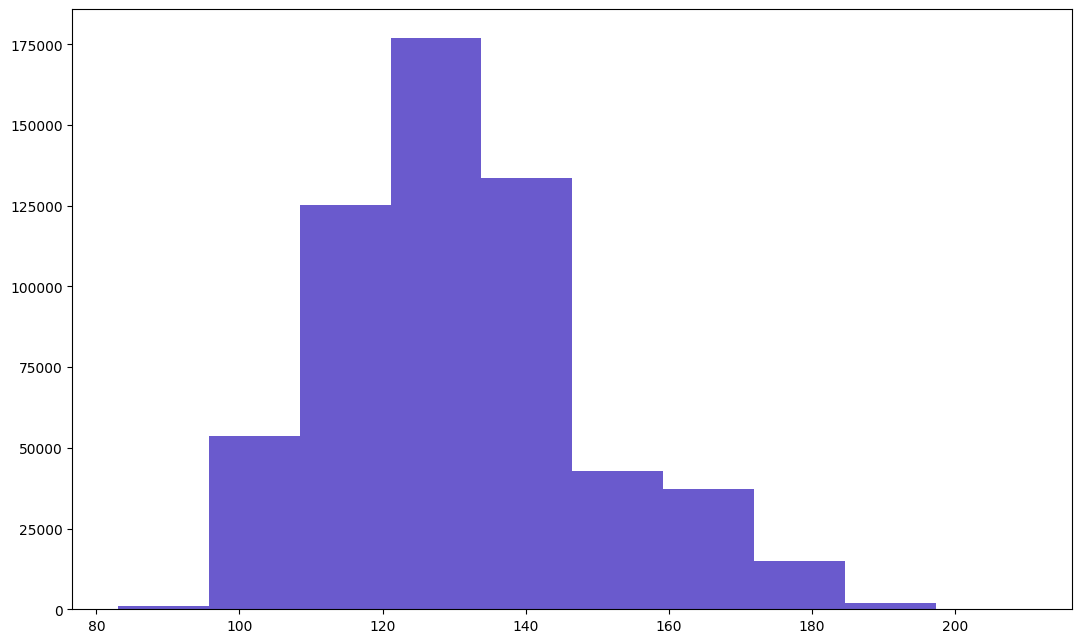

In [182]:
# рассмотрим, как распределяется артериальное давление
fig = plt.figure(figsize=(10, 6))
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(
    x=heart_train_df['resting_blood_pressure'], color='slateblue'
)

In [183]:
# рассмотрим столбец соответствующий артериальному давлению
outliers, cleaned = outliers_iqr(heart_train_df, 'resting_blood_pressure', right= 2.5, left=1.2)
print(f'Число выбросов: {outliers.shape[0]}')
print(outliers['resting_blood_pressure'])
print(outliers.index)

Число выбросов: 1653
23        194
48         95
279        95
714        95
965       193
         ... 
598825     95
599239     93
599369     94
599517    192
599961    194
Name: resting_blood_pressure, Length: 1653, dtype: int64
Index([    23,     48,    279,    714,    965,   1239,   1574,   1986,   2392,
         2913,
       ...
       595114, 595663, 595884, 596657, 597622, 598825, 599239, 599369, 599517,
       599961],
      dtype='int64', length=1653)


In [184]:
# удалим  строки, соответствующие данным значениям,
# учитывая, что эти показатели являются достаточно низкими(менее 95 мм рт ст)
# или высокими( более 190 мм рт ст) для артериального давления покоя,
# также предположим, что среди обследованных пациентов есть страдающие гипертонией,
# поэтому оставим часть высоких значений
heart_train_df = heart_train_df.drop(outliers.index, axis=0)

(array([7.57000e+02, 5.16720e+04, 1.56842e+05, 2.05176e+05, 1.01286e+05,
        4.21680e+04, 2.22910e+04, 4.96300e+03, 4.96000e+02, 1.80000e+01]),
 array([ 98.33 , 141.273, 184.216, 227.159, 270.102, 313.045, 355.988,
        398.931, 441.874, 484.817, 527.76 ]),
 <BarContainer object of 10 artists>)

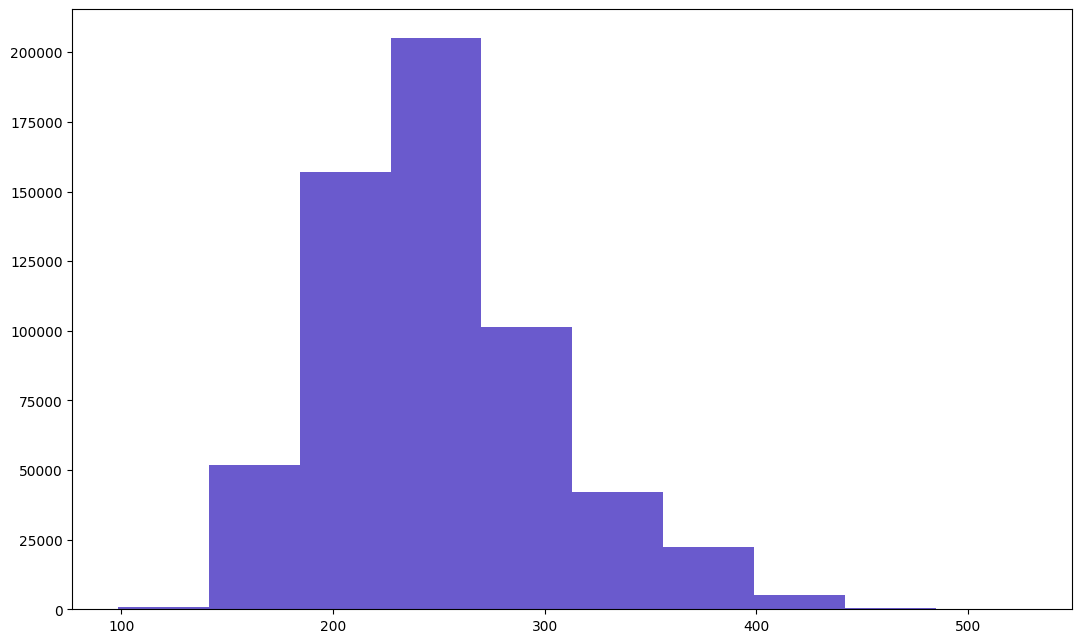

In [185]:
# рассмотрим, как распределяется показатель холестерина крови
fig = plt.figure(figsize=(10, 6))
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(
    x=heart_train_df['serum_cholestoral'], color='slateblue'
)

In [186]:
# столбец, соответствующий уровню холестерина крови
outliers, cleaned = outliers_iqr(heart_train_df, 'serum_cholestoral', right= 3.5, left=1.8)
print(f'Число выбросов: {outliers.shape[0]}')
print(outliers['serum_cholestoral'])
print(outliers.index)

Число выбросов: 40
10620     484.15
20826     495.24
30756     477.48
59480     478.76
62064     495.96
83518     480.51
89588     527.76
101605    481.54
109202    478.27
111046    489.47
118988    486.39
153983    480.82
186854    101.12
203784    478.25
226096    487.70
235930    491.63
259719    484.50
273112    485.22
287787    484.63
288332    493.58
313919    490.83
318668    486.27
339888    511.02
347004    489.12
349499    493.05
353557    482.90
357623    476.90
388013    484.59
390711    490.01
420091    491.30
433242    482.92
436870    481.07
470711    477.42
486182    483.22
504534    478.35
505047     98.33
512327    486.30
519405    490.35
520811    483.23
587393    111.59
Name: serum_cholestoral, dtype: float64
Index([ 10620,  20826,  30756,  59480,  62064,  83518,  89588, 101605, 109202,
       111046, 118988, 153983, 186854, 203784, 226096, 235930, 259719, 273112,
       287787, 288332, 313919, 318668, 339888, 347004, 349499, 353557, 357623,
       388013, 390711, 4

In [187]:
# удалим значения, соответствующие чрезмерно высоким 
# и очень низким цифрам холестерина
heart_train_df = heart_train_df.drop(outliers.index, axis=0)

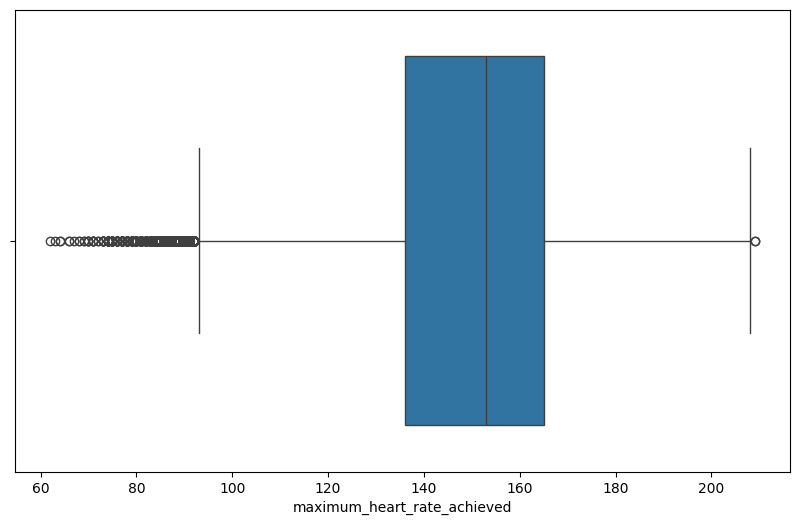

In [188]:
# рассмотрим, как распределяется признак частоты сердечных сокращений
fig = plt.figure(figsize=(10, 6))
boxplot = sns.boxplot(
    data=heart_train_df,
    x='maximum_heart_rate_achieved'
)

In [189]:
# признак частоты сердечных сокращений
outliers, cleaned = outliers_iqr(heart_train_df, 'maximum_heart_rate_achieved', right= 1.5, left=3.5)
print(f'Число выбросов: {outliers.shape[0]}')
print(outliers['maximum_heart_rate_achieved'])
print(outliers.index)

Число выбросов: 2
111268    209
540480    209
Name: maximum_heart_rate_achieved, dtype: int64
Index([111268, 540480], dtype='int64')


In [190]:
# удалим значения, соответствующие большой ЧСС 
heart_train_df = heart_train_df.drop(outliers.index, axis=0)

(array([1.18000e+03, 2.84208e+05, 1.11049e+05, 1.08214e+05, 2.68650e+04,
        3.32970e+04, 1.67180e+04, 3.60000e+03, 4.77000e+02, 1.90000e+01]),
 array([-0.8 , -0.04,  0.72,  1.48,  2.24,  3.  ,  3.76,  4.52,  5.28,
         6.04,  6.8 ]),
 <BarContainer object of 10 artists>)

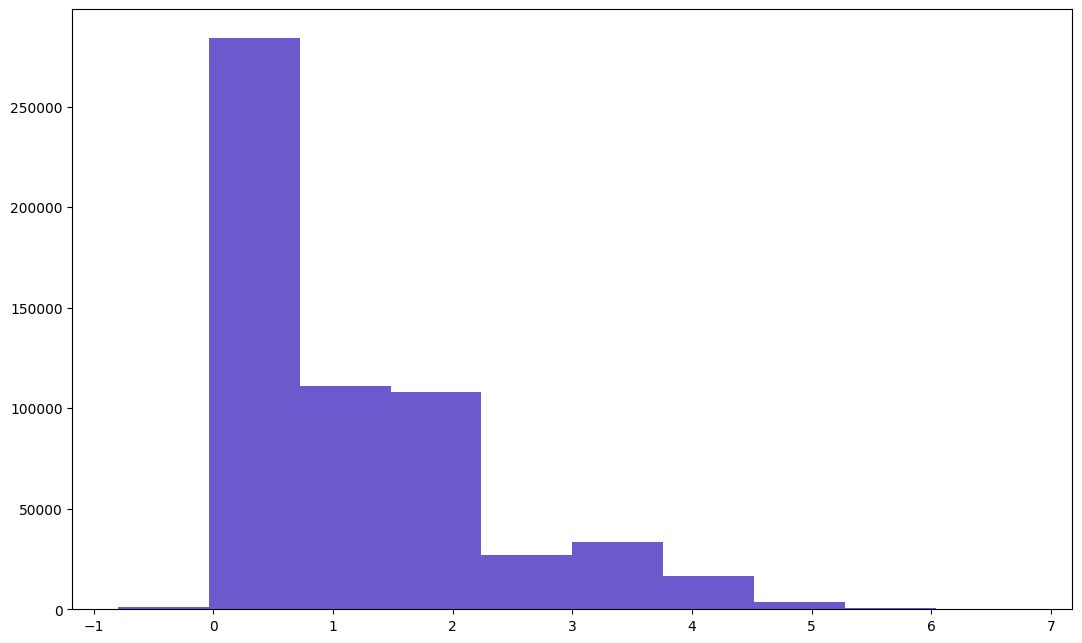

In [191]:
# признак депрессия сегмента ST
fig = plt.figure(figsize=(10, 6))
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(
    x=heart_train_df['oldpeak'], color='slateblue'
)

In [192]:
# депрессия сегмента ST
outliers, cleaned = outliers_iqr(heart_train_df, 'oldpeak', right= 2.5, left=1.5)
print(f'Число выбросов: {outliers.shape[0]}')
print(outliers['oldpeak'])
print(outliers.index)

Число выбросов: 31
156       6.5
12450     6.7
39050     6.1
66434     6.0
89796     6.1
98685     6.1
131446    6.5
134454    6.3
232599    6.7
235348    6.0
313478    6.1
314047    6.0
314613    6.0
339643    6.1
353035    6.0
362467    6.1
389488    6.1
392841    6.0
394833    6.0
402569    6.1
410895    6.0
419405    6.1
433533    6.8
434795    6.0
479677    6.1
500356    6.0
504153    6.1
538643    6.1
567120    6.0
592157    6.6
594645    6.0
Name: oldpeak, dtype: float64
Index([   156,  12450,  39050,  66434,  89796,  98685, 131446, 134454, 232599,
       235348, 313478, 314047, 314613, 339643, 353035, 362467, 389488, 392841,
       394833, 402569, 410895, 419405, 433533, 434795, 479677, 500356, 504153,
       538643, 567120, 592157, 594645],
      dtype='int64')


In [193]:
# удалим очень высокие показатели, 
# отрицательные значения сохраним, так как они , возможно, говорят об элевации ST, 
# что является признаком ишемии и  встречается при сердечно-сосудистых заболеваниях 
heart_train_df = heart_train_df.drop(outliers.index, axis=0)

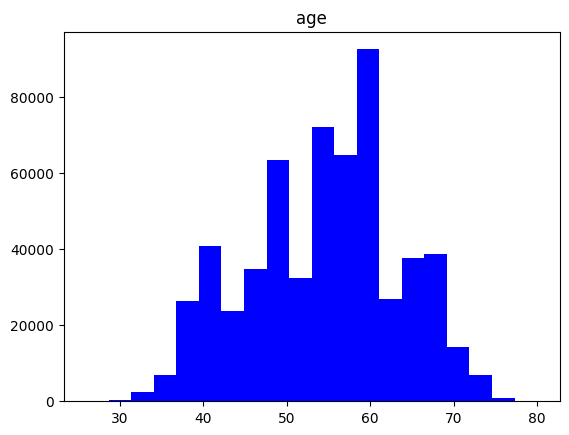

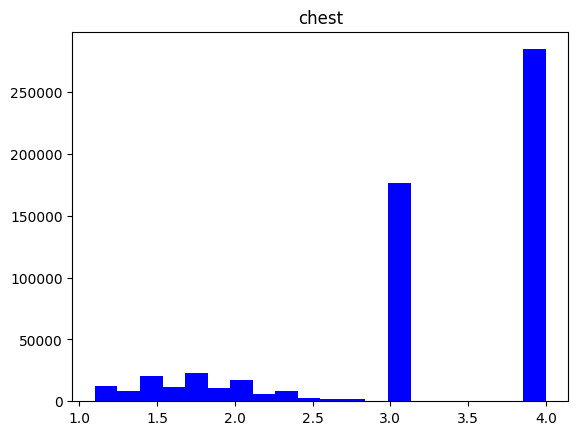

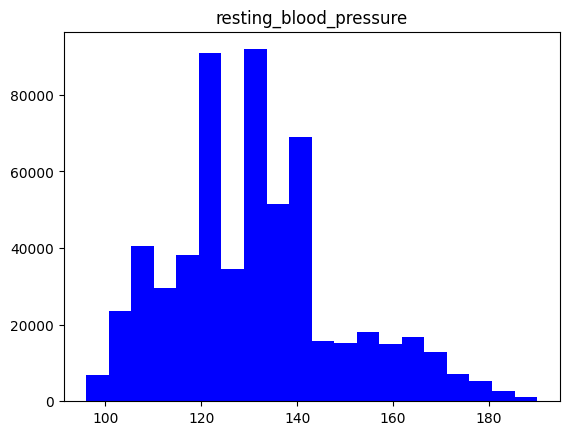

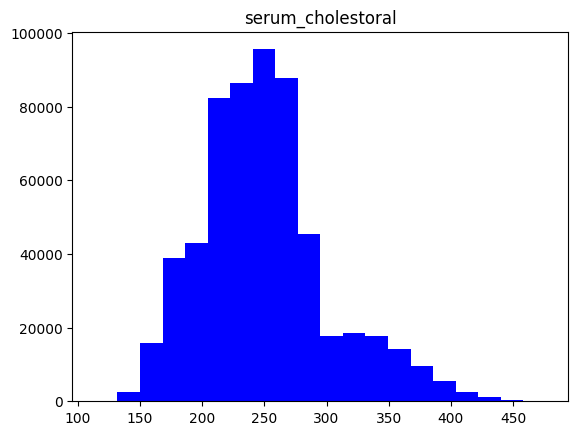

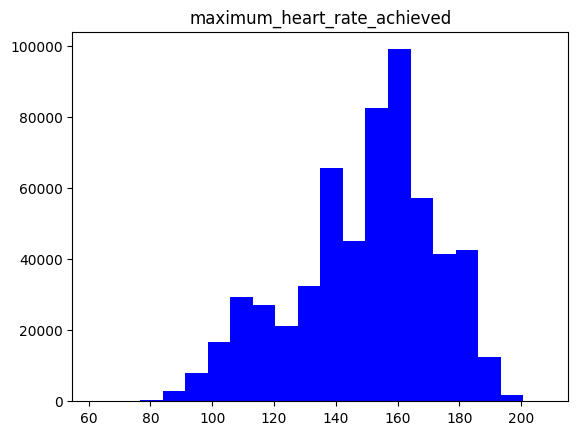

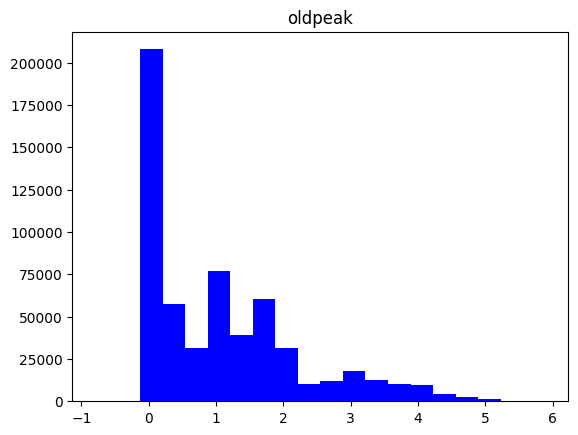

In [194]:
# итоговое рапсределение признаков
i = ['age', 'chest', 'resting_blood_pressure', 'serum_cholestoral', 'maximum_heart_rate_achieved',	'oldpeak']
for j in i:
    plt.hist(heart_train_df[j],bins = 20, color = 'blue')
    plt.title(j)
    plt.show()

In [195]:
#посмотрим на размер оставшейся таблицы
heart_train_df.shape

(585596, 14)

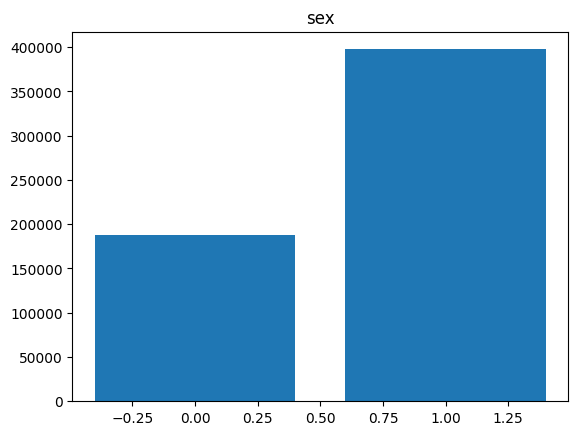

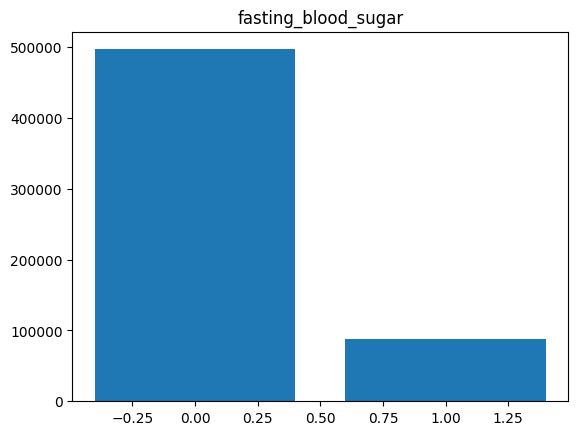

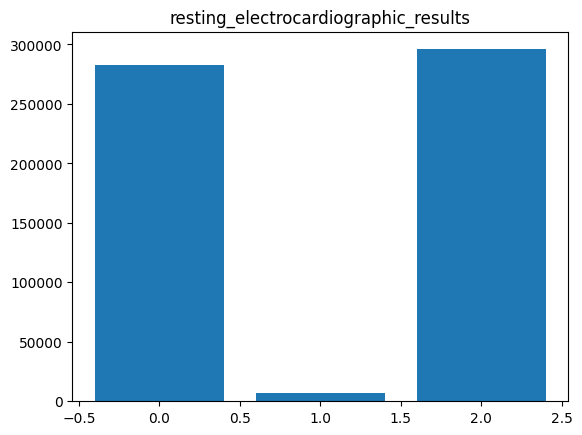

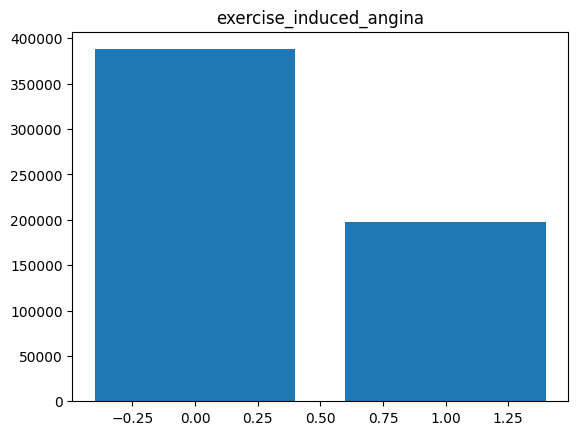

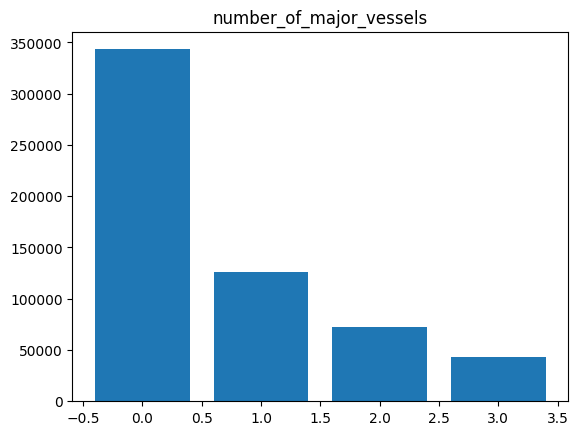

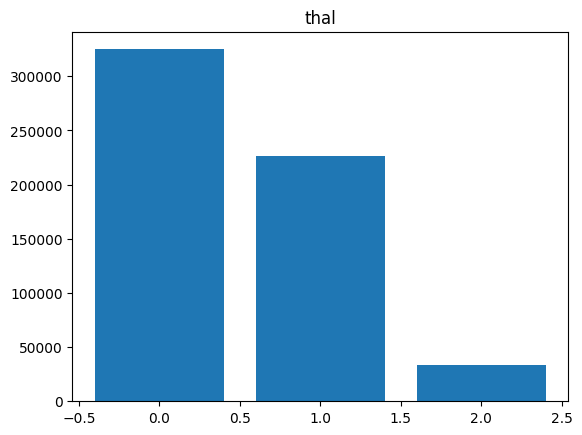

In [196]:
# визуально представим соотношение категориальных признаков
i = ['sex', 'fasting_blood_sugar',	'resting_electrocardiographic_results', 'exercise_induced_angina', 
                  'number_of_major_vessels', 'thal',]
for j in i:
    heart_dis_combinations = heart_train_df[j].value_counts()
    plt.bar(x=heart_dis_combinations.index, height = heart_dis_combinations)
    plt.title(j)
    plt.show()

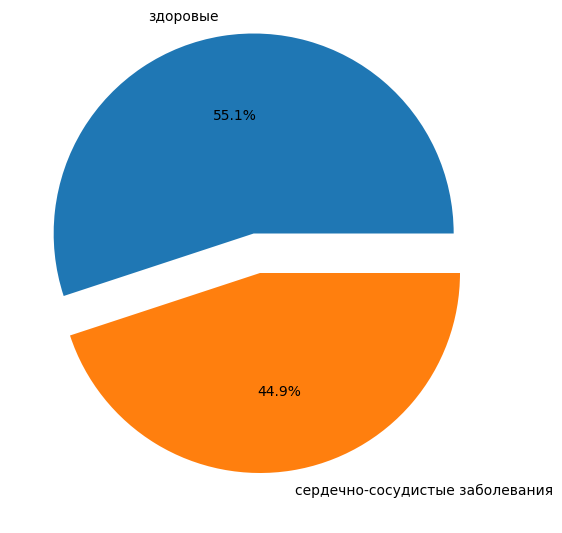

In [197]:
# визуально представим соотношение 
# больных сердечно-сосудистыми заболеваниями и здоровых
heart_dis = heart_train_df['class'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    heart_dis,
    labels=['здоровые', 'сердечно-сосудистые заболевания'],
    autopct='%.1f%%',
    explode = [0.2, 0]
);

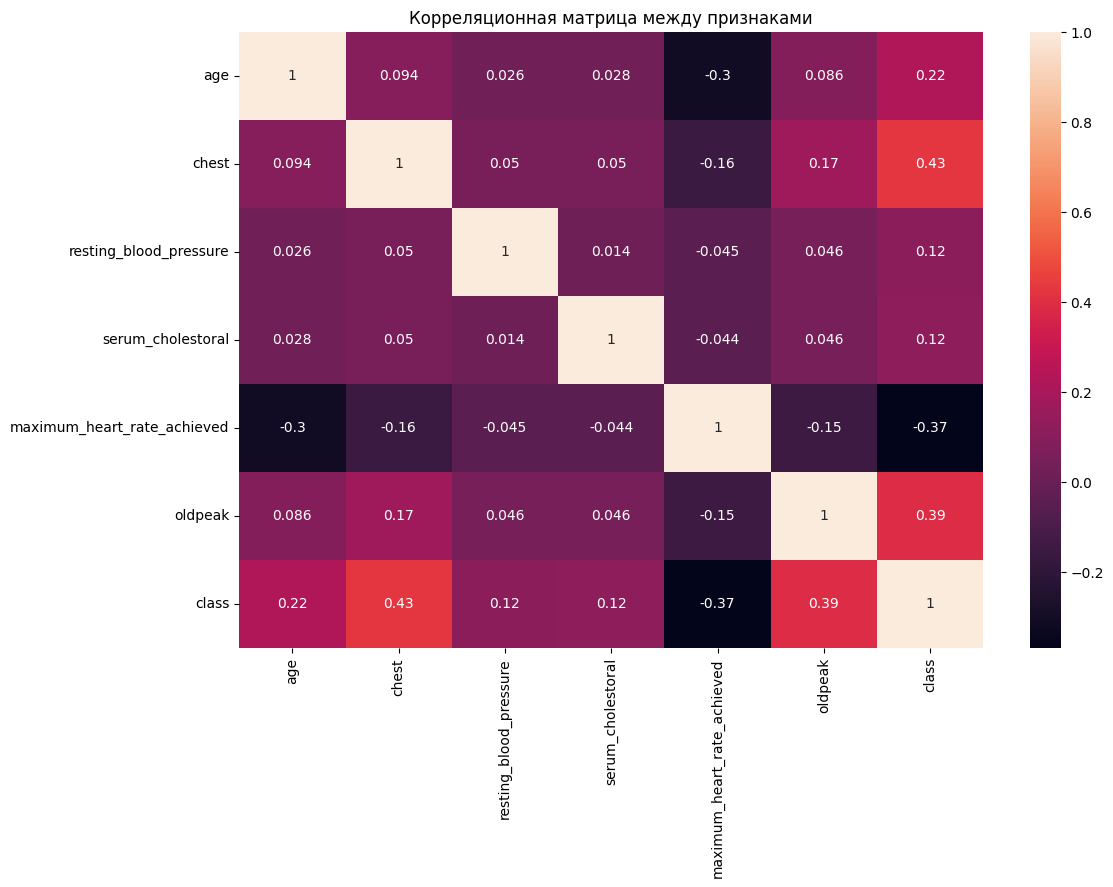

In [198]:
# выделим  признаки для создания корреляционной матрицы
corr_data = heart_train_df[[ 'age',	'chest', 'resting_blood_pressure', 'serum_cholestoral', 'maximum_heart_rate_achieved', 	'oldpeak', 'class']]
#Корреляционная матрица между признаками
plt.figure(figsize = (12,8))
cm = corr_data.corr()
sns.heatmap(cm, annot = True)
plt.title('Корреляционная матрица между признаками')
plt.show()

Согласно представленным данным, более сильное влияние на наличие заболеваний сердца оказывают признаки возраст, боль в грудной клетке и изменения сегмента ST на ЭКГ.

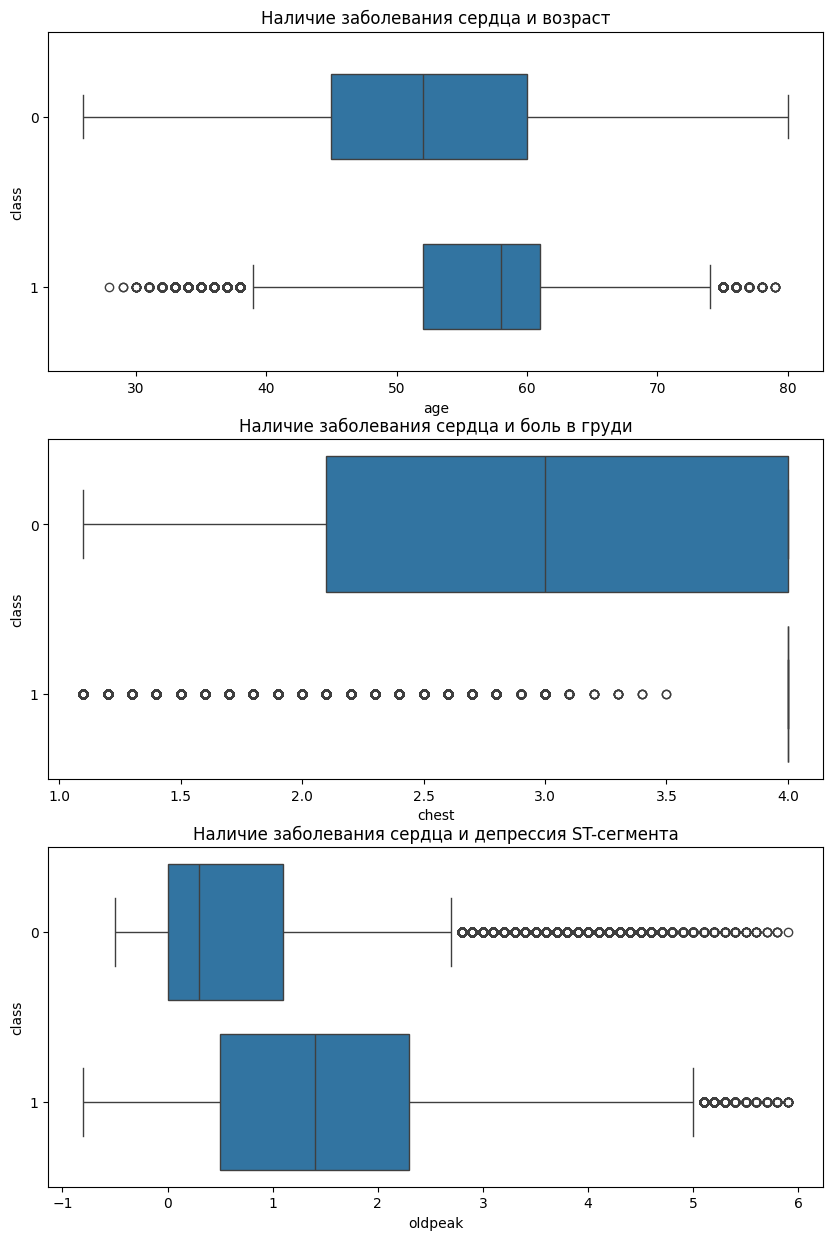

In [231]:
# рассмотрим влияние возраста, выраженности болевого синдрома,
#  изменений на ЭКГ на развитие заболеваний сердца
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))
sns.boxplot(
    data=heart_train_df,
    x='age',
    y='class',
    orient='h',
    width=0.5, ax=axes[0]
);
axes[0].set_title("Наличие заболевания сердца и возраст")

sns.boxplot(
    data=heart_train_df,
    x='chest',
    y='class',orient='h', ax=axes[1]
)
axes[1].set_title('Наличие заболевания сердца и боль в груди');

sns.boxplot(
    data=heart_train_df,
    x='oldpeak',
    y='class',orient='h', ax=axes[2]
)
axes[2].set_title('Наличие заболевания сердца и депрессия ST-сегмента');

 На графиках видно, что с возрастом вероятность развития заболеваний сердца увеличивается, часто встречаются бессимптомные формы, но сопровождаются изменениями на ЭКГ.

In [200]:
# определим целевую переменную
X = heart_train_df.drop('class', axis=1) 
y = heart_train_df['class'] 

In [201]:
# Предобработка данных
from sklearn import preprocessing
pre_process = preprocessing.StandardScaler().fit(X)
x_transform = pre_process.fit_transform(X)

In [202]:
# Разбиваем данные на тестовую и тренировочную выборки
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_transform, y, test_size = 0.2, random_state = 42)

#### Обучим следующие модели
- Logistic Regression
- Randomforest
- Neural Network

In [203]:
#  импортируем необходимые библиотеки
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#### Логистическая регрессия

In [204]:
# Создаем экземпляр модели
log_reg = LogisticRegression()
#Загружаем данные
log_reg.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
#Прогнозирование модели
y_pred_log_reg = log_reg.predict(X_test)
print('Logistic Regression')
#Расчет accuracy
print('--'*30)
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg) *
  100,2)
print('Accuracy', log_reg_accuracy,'%')

Logistic Regression
------------------------------------------------------------
Accuracy 87.1 %


Precision: 0.86
Recall: 0.85
------------------------------------------------------------
[[57395  7039]
 [ 8072 44614]]


<Axes: >

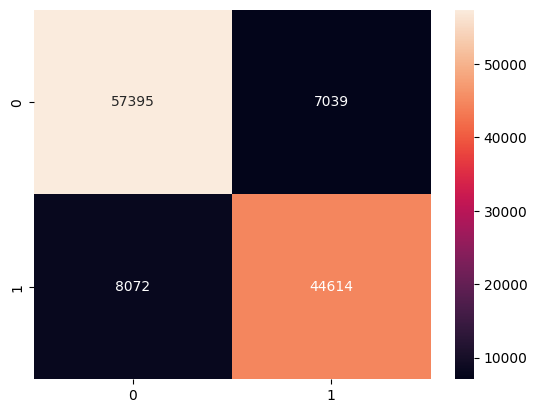

In [205]:
#Расчет precision and recall
from sklearn.metrics import precision_score, recall_score, confusion_matrix
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)

#Построение confusion matrix
confusion = confusion_matrix(y_test, y_pred_log_reg)
print(confusion)
sns.heatmap(confusion, annot=True, fmt="d")

In [206]:
# итоговый вывод метрик
from sklearn.metrics import classification_report
print("Логическая регрессия:")
print(classification_report(y_test,  y_pred_log_reg))

Логическая регрессия:
              precision    recall  f1-score   support

           0       0.88      0.89      0.88     64434
           1       0.86      0.85      0.86     52686

    accuracy                           0.87    117120
   macro avg       0.87      0.87      0.87    117120
weighted avg       0.87      0.87      0.87    117120



In [207]:
from sklearn.model_selection import GridSearchCV
# проведем подбор гиперпараметров  модели
#  определение параметров модели для настройки гиперпараметров
mp =    { 'penalty':['l1', 'l2', 'elasticnet', 'none'],
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'multi_class': ['auto', 'ovr', 'multinomial'],
        }
scores = []
clf =  GridSearchCV(log_reg, mp, cv=3, return_train_score=False)
clf.fit(X_train,y_train)
scores.append({
        'model': 'Logistic_Regression',
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    }) 

In [208]:
# результат запишем в виде таблицы
best = pd.DataFrame(scores,columns=['model','best_score','best_params'])
best

,model,best_score,best_params
0,Logistic_Regression,0.871949,"{'multi_class': 'auto', 'penalty': 'l2', 'solv..."


In [209]:
# параметры для обучения модели
best.best_params[0]

{'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}

In [210]:
# Создаем экземпляр модели и обучаем с использованием найденных параметров
log_reg = LogisticRegression ( multi_class='auto', penalty='l2', solver='newton-cg')
#Загружаем данные
log_reg.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
#Прогнозирование модели
y_pred_log_reg = log_reg.predict(X_test)
print('Logistic Regression')
#Расчет accuracy
print('--'*30)
log_reg_accuracy = round(accuracy_score(y_test, y_pred_log_reg) *
  100,2)
print('Accuracy', log_reg_accuracy,'%')
# метрику улчшить не удалось, но времени потрачено больше

Logistic Regression
------------------------------------------------------------
Accuracy 87.1 %


#### Randomforest

In [211]:
# Создаем экземпляр модели 
rfc = RandomForestClassifier()
#Загружаем данные
rfc.fit(X_train,y_train)
#Прогнозирование модели
y_pred_rfc = rfc.predict(X_test)
print('Random Forest Classifier')
print('--'*30)
rfc_accuracy = round(accuracy_score(y_test, y_pred_rfc) * 100,2)
print('Accuracy', rfc_accuracy,'%')

Random Forest Classifier
------------------------------------------------------------
Accuracy 89.58 %


Precision: 0.89
Recall: 0.88
------------------------------------------------------------


<Axes: >

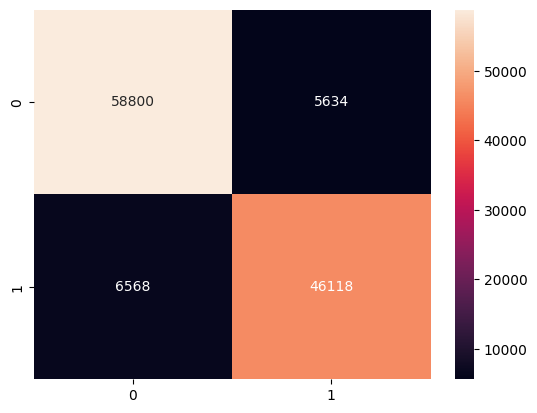

In [212]:
#Расчет precision and recall
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)
print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print("--"*30)
confusion = confusion_matrix(y_test, y_pred_rfc)
sns.heatmap(confusion, annot=True, fmt="d")

In [213]:
# итоговый вывод метрик
print("Random Forest Classifier:")
print(classification_report(y_test,  y_pred_rfc))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.90      0.91      0.91     64434
           1       0.89      0.88      0.88     52686

    accuracy                           0.90    117120
   macro avg       0.90      0.89      0.89    117120
weighted avg       0.90      0.90      0.90    117120



#### Глубокая нейронная сеть

In [214]:
# импорт библтотек для глубокой нейронной сети
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [215]:
# Строим модель
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

# Компиляция модели
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=[tf.keras.metrics.AUC()]
)

# Обучение модели с ранней остановкой
early_stop = EarlyStopping(monitor='val_auc', mode='max', patience=10, restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=1024,
    validation_data=(X_test, y_test),
    callbacks=[early_stop],
    verbose=1
)

# Оценка модели
y_proba_nn = model.predict(X_test).ravel()
y_pred_nn = (y_proba_nn > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
print("Глубокая нейронная сеть:")
print(classification_report(y_test, y_pred_nn))
print('--'*30)
print(f"AUC: {roc_auc_score(y_test, y_proba_nn):.4f}")

Epoch 1/50
458/458 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - auc_3: 0.9220 - loss: 0.3466 - val_auc_3: 0.9573 - val_loss: 0.2626
Epoch 2/50
458/458 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - auc_3: 0.9535 - loss: 0.2739 - val_auc_3: 0.9588 - val_loss: 0.2579
Epoch 3/50
458/458 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - auc_3: 0.9557 - loss: 0.2670 - val_auc_3: 0.9594 - val_loss: 0.2564
Epoch 4/50
458/458 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - auc_3: 0.9573 - loss: 0.2621 - val_auc_3: 0.9599 - val_loss: 0.2559
Epoch 5/50
458/458 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - auc_3: 0.9580 - loss: 0.2596 - val_auc_3: 0.9602 - val_loss: 0.2552
Epoch 6/50
458/458 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - auc_3: 0.9584 - loss: 0.2587 - val_auc_3: 0.9605 - val_loss: 0.2540
Epoch 7/50
458/458 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - auc_3: 0.9585 - loss: 0.2583 - val_auc_3: 0.9608 - val_loss: 0.2535
Epoch 8/50
458/458 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - auc_3: 0.9585 - loss: 0.2583 - val_auc_3: 0.9612 - val_loss: 0.2529
Epoch 9/50
458/458 ━━━━━

dict_keys(['auc_3', 'loss', 'val_auc_3', 'val_loss'])


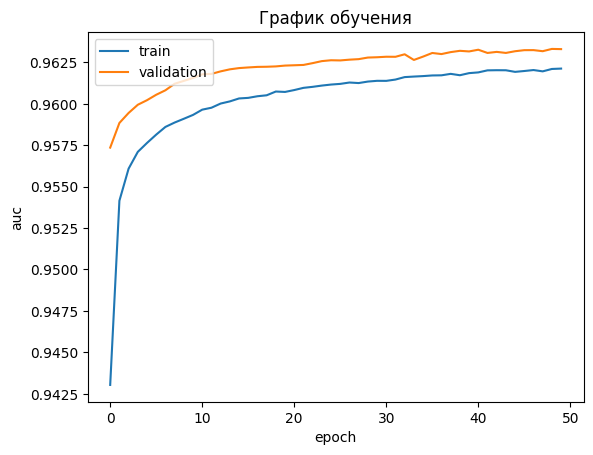

In [236]:
# График обучения
print(history.history.keys())
#  "Accuracy"
plt.plot(history.history['auc_3'])
plt.plot(history.history['val_auc_3'])
plt.title('График обучения')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

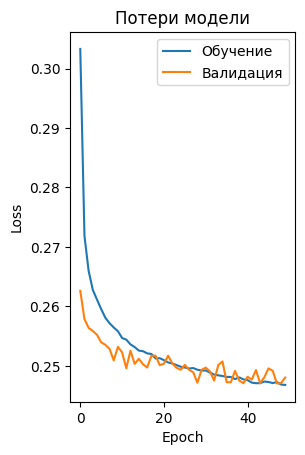

In [216]:
# график потерь
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Обучение')
plt.plot(history.history['val_loss'], label='Валидация')
plt.title('Потери модели')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

Модель нейронной сети показала наибольшую точность предсказаний.

In [217]:
# сохраненим модели нейронной сети
model.save('NN_model.keras')

Рассмотрим тестовый набор данных и проведем предобработку.

In [218]:
#прочитаем  файл и запишем в переменную  heart_test_df 
heart_test_df = pd.read_csv('data/tech-weekend-data-science-hackathon/test.csv')
display(heart_test_df.head())

,ID,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal
0,600000,53.963191,1,4.000000,136.940829,236.862814,0,2,143.961525,1,0.711100,1,2,7
1,600001,49.621479,1,4.000000,122.024651,226.593019,0,2,112.220874,1,0.000000,1,1,7
2,600002,36.933893,1,1.300924,127.585643,351.061046,0,0,177.945922,0,0.313078,1,0,7
3,600003,54.884588,1,3.000000,124.876745,250.370530,0,0,153.176526,0,0.308277,1,1,7
4,600004,71.016392,0,1.746972,120.922600,210.979710,0,0,164.573122,0,1.021370,1,1,3


In [219]:
#с помощью функции info узнаем о столбцах и строках датасета
heart_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 14 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   ID                                    400000 non-null  int64  
 1   age                                   400000 non-null  float64
 2   sex                                   400000 non-null  int64  
 3   chest                                 400000 non-null  float64
 4   resting_blood_pressure                400000 non-null  float64
 5   serum_cholestoral                     400000 non-null  float64
 6   fasting_blood_sugar                   400000 non-null  int64  
 7   resting_electrocardiographic_results  400000 non-null  int64  
 8   maximum_heart_rate_achieved           400000 non-null  float64
 9   exercise_induced_angina               400000 non-null  int64  
 10  oldpeak                               400000 non-null  float64
 11  

In [220]:
# округлим значения возраста до целого числа
heart_test_df['age'] = heart_test_df['age'].apply(round)
# округлим значения признака боли в груди до 1 знака после запятой
heart_test_df['chest'] = np.round(heart_test_df['chest'], decimals = 1) 
# округлим величину артериального давления до целого числа
heart_test_df['resting_blood_pressure'] = heart_test_df['resting_blood_pressure'].apply(round)
# уровень холестерина -  до 1 знака после запятой
heart_test_df['serum_cholestoral'] = np.round(heart_test_df['serum_cholestoral'], decimals = 2)
# масимальную частоту сердечных сокращений - до целого числа
heart_test_df['maximum_heart_rate_achieved'] = heart_test_df['maximum_heart_rate_achieved'].apply(round)
# округлим величину депрессии сегмента  ST до 1 знака после запятой
heart_test_df['oldpeak'] = np.round(heart_test_df['oldpeak'], decimals = 1)
#  применяем функцию  get_thal 
heart_test_df['thal'] = heart_test_df['thal'].apply(get_thal)

In [221]:
#  отдельно сохранияем столбец с ID
id_df = heart_test_df['ID']

In [222]:
# удалим столбец с ID пациента
heart_test_df = heart_test_df.drop('ID', axis=1)

In [223]:
# Предобработка данных
pre_proc_t = preprocessing.StandardScaler().fit(heart_test_df)
test = pre_proc_t.fit_transform(heart_test_df)

In [224]:
# Применение модели
y_pred_test=model.predict(test)
y_predicted = (y_pred_test > 0.5).astype(int).flatten()

12500/12500 ━━━━━━━━━━━━━━━━━━━━ 20s 2ms/step


In [225]:
# сохраняем предсказание 
df=pd.DataFrame({'class':y_predicted})
# итоговый датафрейм
df_res = pd.concat([id_df,df],axis=1)
df_res

,ID,class
0,600000,1
1,600001,1
2,600002,0
3,600003,0
4,600004,0
...,...,...
399995,999995,0
399996,999996,1
399997,999997,0
399998,999998,0


In [226]:
# сохранение результата работы модели  в файл submission_file.csv
df_res.to_csv(r"submission_file.csv",index=False,header=True)